<a href="https://colab.research.google.com/github/xcccl1/BDAO_IMA/blob/main/Sentiment_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_name = "tips_nlp" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

df = query_job.to_dataframe()
df.head()

,user_id,business_id,text,date,compliment_count,filtered_review,filtered_review_2
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,they have lots of good deserts and tasty cuban...,2013-02-05 18:35:10+00:00,0,lot good desert tasty cuban sandwich,lot good desert tasty cuban sandwich
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,turkey and roast beef,2012-10-11 13:04:02+00:00,0,turkey roast beef,turkey roast beef
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,coffee and baby bread,2012-10-24 12:37:05+00:00,0,coffee baby bread,coffee baby bread
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,such a great place to come and get a cuban san...,2016-10-02 16:53:40+00:00,0,great place come get cuban sandwich smell brea...,great place come get cuban sandwich smell brea...
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,my last time continental and a cuban,2012-11-09 18:51:34+00:00,0,last time continental cuban,last time continental cuban


In [ ]:
df.isnull().sum()

user_id              0
business_id          0
text                 0
date                 0
compliment_count     0
filtered_review      0
filtered_review_2    0
dtype: int64

In [ ]:
import pandas as pd

# set the target column to the review column
target_column = "filtered_review_2"

In [ ]:
from textblob import TextBlob
import numpy as np
df['Polarity'] = df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
df['Subjectivity'] = df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)
df['Sentiment'] = np.where(df['Polarity']>0, 'Positive',np.where(df['Polarity']<0,'Negative', 'Neutral')) # here we set 0 as the benchmark. you can adjust based on your data

In [ ]:
# sort by polarity (low to high)
sorted_df = df.sort_values(by=['Polarity'])

# print top 5 positive and negative
print("Most positive #5 reviews ")
print(sorted_df[target_column].tail())
print("\n") # print line break
print("Most negative #5 reviews ")
print(sorted_df[target_column].head())

Most positive #5 reviews 
172688    best cheesecake town obsess
172672                  awesome place
172665           food service awesome
387937          best pizza ever close
406622        seafood gumbo delicious
Name: filtered_review_2, dtype: object


Most negative #5 reviews 
269206                   food awful park nightmare
629434         horrible charge bag chip outrageous
267555    save money buy dog food even water nasty
124160                            horrible service
267544           food terrible stuff founder fishy
Name: filtered_review_2, dtype: object


<Axes: xlabel='Sentiment', ylabel='count'>

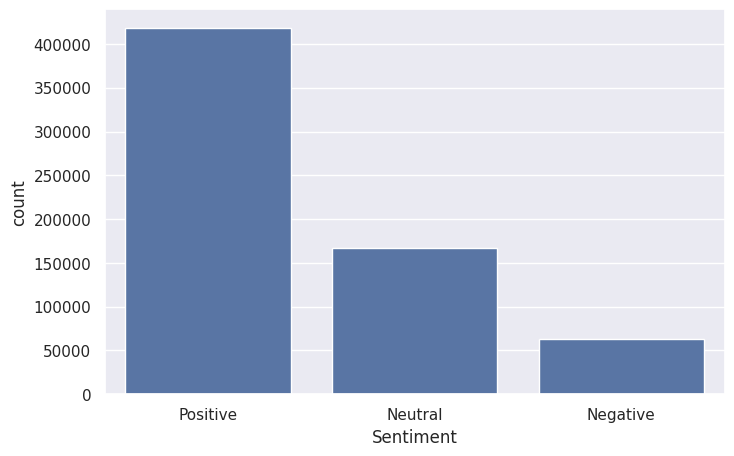

In [ ]:
# Sentiment analysis visualisation
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='Sentiment',data = df,order=['Positive','Neutral','Negative'])

In [ ]:
# finally, save the new dataframe with all the scores to the local machine.

df.to_csv('sentiment_textblob.csv', index=False) # save the file to google drive


NameError: name 'files' is not defined

In [ ]:
from google.colab import files
files.download('sentiment_textblob.csv') # download the file to your local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# First, ensure pandas-gbq is installed
!pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant_data.sentiment_analysis1'
project_id = 'bdaoima-422710'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 3123.09it/s]
